<a href="https://www.kaggle.com/code/jobin2004/lung-cancer-prediction?scriptVersionId=152591581" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# What the model will predict
The goal is to develop a model that can analyze the features and predict whether a patient is at risk of developing lung cancer. We have to identify the stages of cancer whether it is low, medium or high.

In [1]:
# Setup plotting
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex5 import *

In [2]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [3]:
#Reading dataset
df = pd.read_csv('/kaggle/input/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv')

In [4]:
#Data visualization
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [6]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [7]:
X = df.copy().dropna()
X.drop('index', axis=1, inplace=True)
X.drop('Patient Id', axis=1, inplace=True)
y = X.pop('Level')

features_num = ['Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring']

In [8]:
#Data pre-processing
preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
)

In [9]:
X.shape

(1000, 23)

In [10]:
#spliting the data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 9598)

# Encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [11]:
X_train.shape

(750, 23)

In [12]:
X_test.shape

(250, 23)

# CLASSIFICATION PROBLEM

In [13]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

input_shape = [X_train.shape[1]]

In [14]:
from keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)


In [15]:
from keras.utils import plot_model

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax'),
])

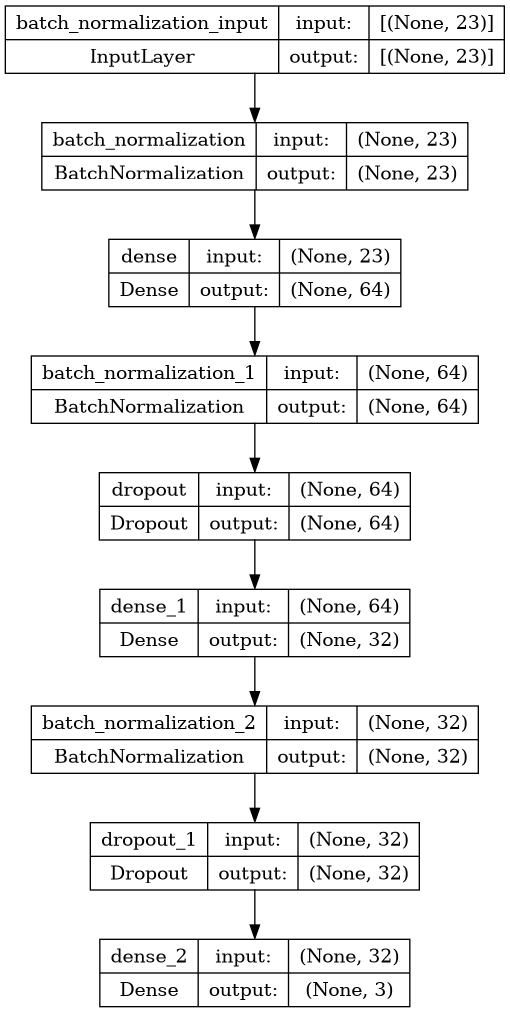

In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Use categorical crossentropy for multiclass classification
    metrics=['accuracy'],  # Use 'accuracy' for multiclass classification
)

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Input Layer:
The Batch Normalization layer helps in normalizing the input by adjusting and scaling the activations. It helps the model learn more efficiently.
# Hidden Layers:
**Dense Layer 1 (64 neurons, ReLU activation):**
This layer has 64 neurons, each applying a Rectified Linear Unit (ReLU) activation function. This helps introduce non-linearity to the model, allowing it to learn complex patterns in the data.
**Batch Normalization:**
Similar to the input layer, this layer normalizes the activations, helping in the efficient training of the model.
**Dropout (30%):**
 Dropout is a regularization technique that randomly sets 30% of the input units to zero during training. This helps prevent overfitting.
 **Dense Layer 2 (32 neurons, ReLU activation):**
 Another dense layer with 32 neurons and ReLU activation, providing additional capacity for learning intricate patterns.
 **Batch Normalization:**
 Similar to previous layers, this normalizes the activations.
**Dropout (30%):**
 Another dropout layer to further prevent overfitting.
# Output Layer:
**Dense Layer (3 neurons, Softmax activation):**
The final layer consists of three neurons, each representing one of your target classes (**low**,**medium** and **high**). The softmax activation function is used here, transforming the network's output into probability scores for each class. The class with the highest probability is the predicted class.

Epoch 1/200
2/2 [==============================] - 2s 248ms/step - loss: 2.5105 - accuracy: 0.1600 - val_loss: 1.4257 - val_accuracy: 0.2200
Epoch 2/200
2/2 [==============================] - 0s 34ms/step - loss: 2.2559 - accuracy: 0.2213 - val_loss: 1.3225 - val_accuracy: 0.2480
Epoch 3/200
2/2 [==============================] - 0s 33ms/step - loss: 1.8485 - accuracy: 0.2827 - val_loss: 1.2267 - val_accuracy: 0.3120
Epoch 4/200
2/2 [==============================] - 0s 33ms/step - loss: 1.6123 - accuracy: 0.3547 - val_loss: 1.1364 - val_accuracy: 0.4080
Epoch 5/200
2/2 [==============================] - 0s 35ms/step - loss: 1.3376 - accuracy: 0.3960 - val_loss: 1.0532 - val_accuracy: 0.4760
Epoch 6/200
2/2 [==============================] - 0s 36ms/step - loss: 1.1737 - accuracy: 0.4707 - val_loss: 0.9766 - val_accuracy: 0.5920
Epoch 7/200
2/2 [==============================] - 0s 38ms/step - loss: 1.0236 - accuracy: 0.5667 - val_loss: 0.9071 - val_accuracy: 0.6920
Epoch 8/200
2/2 [==

<Axes: title={'center': 'Accuracy'}>

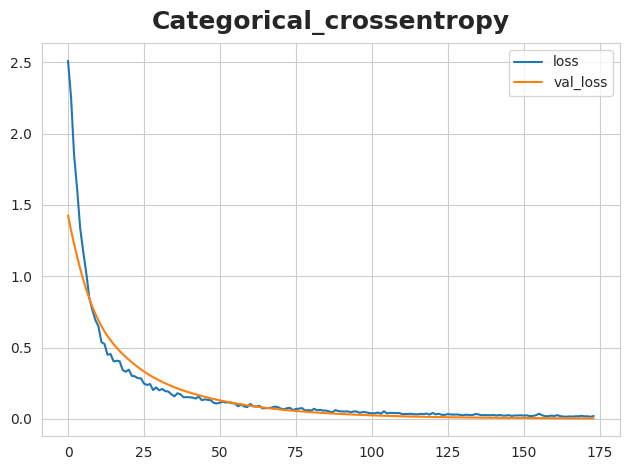

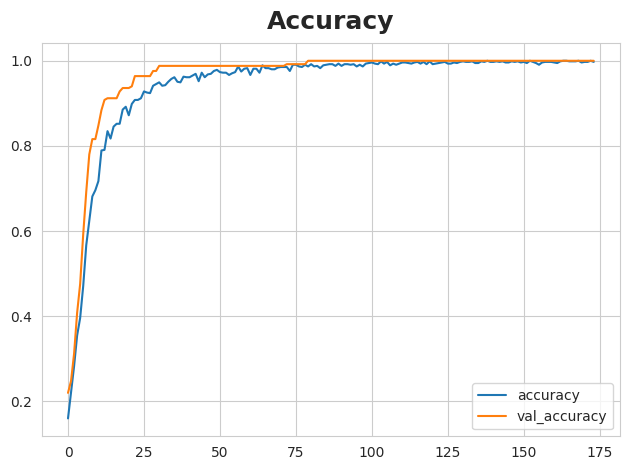

In [17]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train_one_hot,
    validation_data=(X_test, y_test_one_hot),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Categorical_crossentropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")